In [1]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from operator import attrgetter
from pytplan import *

ag_ha = attrgetter(*'t v_0 v_c v_1 a_max'.split())
ag = attrgetter(*'x t v_0 v_c v_1 v_max a_max'.split())

def ch(v):
    for e in chain(*v):
        if e is not None:
            yield e

j = Joint(5_000, 50_000)
       
   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0.000241394221253043, 4.0096535345598835e-05, 4.8311593226598194e-05, 0.0002783786879379923]


  0 0.0000 0.2504|[0        250 100  ↗4998      750 150  ↘0      0      4998] [0          0 1    ↗40         10 250  ↘0      0        40]
  1 0.2504 0.1801|[4998       0 0    ↗5000      900 180  ↘0      0      4997] [40         0 0    ↗56         10 180  ↘0      0        47]
  2 0.4305 0.2039|[4997       0 0    ↗4999      882 176  ↘118    27     3631] [47         0 0    ↗49         10 203  ↘0      0        25]
  3 0.6343 0.2542|[3631     118 27   ↗4998      632 127  ↘250    100       0] [25         0 0    ↗39         10 253  ↘0      1         0]


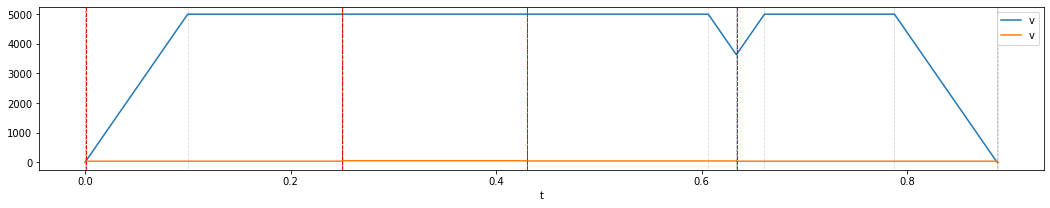

In [12]:
# Too many planning updates for sid=1.
%load_ext autoreload
%autoreload 2
%matplotlib inline

from pytplan.planner import Segment, SegmentList, Joint
from pytplan.gsolver import Block 

j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)   
s = sl.move([1000,10])
s = sl.move([900,10])
s = sl.move([1000,10])
s = sl.move([1000,10])

sl.plot()
print([s.times_e_rms for  s in sl])
sl

In [14]:
for s in sl:
    print(s.times)

[0.250059, 0.2504]
[0.18, 0.180057]
[0.203799, 0.203867]
[0.253801, 0.254194]
